In [2]:
import numpy as np                               #for creating ndarrays for fast and efficient computations

import matplotlib as mpl                         #for graphing purposes
import matplotlib.pyplot as plt                  #for making plots
from mpl_toolkits.mplot3d import Axes3D          #for making 3d Axes (canvas)

#for interactive notebooks
%matplotlib notebook

/home/johnnguyen1792/.local/lib/python3.5/site-packages/ipykernel_launcher.py:6: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  
/home/johnnguyen1792/.local/lib/python3.5/site-packages/ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  import sys


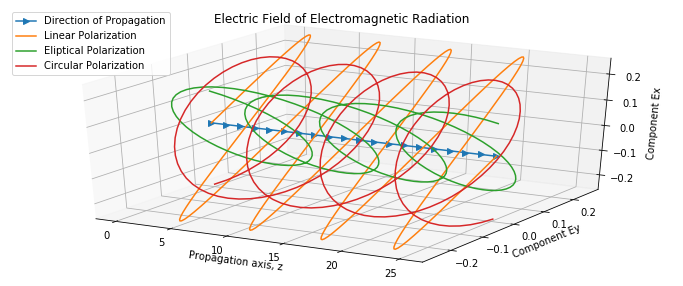

In [166]:
steps_size= 200
z = 8*np.pi

Z = np.linspace (0, z, steps_size)

Z_prop =np.linspace (0, z, steps_size/10)
K_prop = np.linspace(0,0, steps_size/10)

electric = plt.figure(figsize=(12,5))
electric_ax_1 = electric.add_subplot(111, projection="3d")
electric_ax_1.set_title('Electric Field of Electromagnetic Radiation') #title
electric_ax_1.set_xlabel('Propagation axis, z') # label the x axis
electric_ax_1.set_ylabel('Component Ey') # label the y axis
electric_ax_1.set_zlabel('Component Ex') # label the z axis

electric_plot1 = electric_ax_1.plot(Z_prop, K_prop, K_prop, marker= '>',label = 'Direction of Propagation')
electric_plot1 = electric_ax_1.plot(Z, 0.25*np.sin(Z), 0.25*np.sin(Z),label = 'Linear Polarization')
electric_plot2 = electric_ax_1.plot(Z, 0.25*np.sin(Z), -0.25*np.sin(Z-np.pi/6), label = 'Eliptical Polarization')
electric_plot3 = electric_ax_1.plot(Z, 0.25*np.sin(Z), 0.25*np.sin(Z-np.pi/2), label = 'Circular Polarization')
electric_ax_1.legend()
electric.savefig('Polarization_of_Electromagnetic_Radiation.png', format = 'png', bbox_inches ='tight')

In [15]:
electric.savefig('Polarization_of_Electromagnetic_Radiation.png', format = 'png')

In [163]:
x = np.linspace(-1,1,10000)
y = np.linspace(-1,1,10000)
z = np.linspace(-1,1,10000)
def rho(x,y):
    return np.sqrt(x**2 + y**2)

def beam_focus(lam = 3.5*10**-9 ,z_0 = 0.25):
    w_0 = np.sqrt(lam*z_0/np.pi)
    return w_0

def beam_waist(z, lam = 3.5*10**-9 ,z_0 = 0.25):
    w_0 = beam_focus(lam,z_0)
    w = w_0 *np.sqrt(1+(z**2/z_0**2))*1000000
    return w

def electric_field_GB(x, y, z, z_0, lam = 3.5*10**-9, E_0 = 1, phase_shift = 0):
    r = rho(x,y)
    jones_vec = (np.cos(z), np.cos(z+phase_shift))
    w_0 = beam_focus(lam, z_0)
    w = beam_waist(z)
    E_0_y = jones_vec[0]*w_0/w * np.exp(-(r**2/w**2))
    E_0_x = jones_vec[1]*w_0/w * np.exp(-(r**2/w**2))
    E_vec =np.array((E_0_x,E_0_y))
    return E_vec
    

In [152]:
electric_field_GB(x, y, z, z_0 = 3, phase_shift = np.pi/4)

array([[ 8.20548985e-07,  8.20739256e-07,  8.20929564e-07, ...,
        -1.78584271e-07, -1.78714812e-07, -1.78845296e-07],
       [ 4.53753030e-07,  4.53979838e-07,  4.54206713e-07, ...,
         4.54206713e-07,  4.53979838e-07,  4.53753030e-07]])

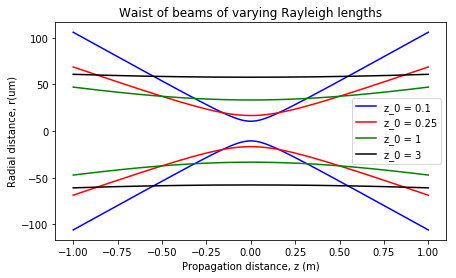

In [158]:
rho = np.linspace(-1,1,1000)
z = np.linspace(-1,1,1000)

gaussian_beams = plt.figure(figsize = (7,4))
gaussian_beams_ax = gaussian_beams.add_subplot(111)
beam0top = gaussian_beams_ax.plot(z, beam_waist(z, z_0 = 0.1), c = 'b', label = 'z_0 = 0.1')
beam0bot = gaussian_beams_ax.plot(z, -beam_waist(z,z_0 = 0.1), c = 'b')

beam1top = gaussian_beams_ax.plot(z, beam_waist(z,z_0 = 0.25), c = 'r', label = 'z_0 = 0.25')
beam1bot = gaussian_beams_ax.plot(z, -beam_waist(z,z_0 = 0.25), c = 'r')

beam2top = gaussian_beams_ax.plot(z, beam_waist(z,z_0 = 1), c = 'g', label = 'z_0 = 1')
beam2bot = gaussian_beams_ax.plot(z, -beam_waist(z,z_0 = 1), c = 'g' )

beam3top = gaussian_beams_ax.plot(z, beam_waist(z,z_0 = 3), c = 'k', label = 'z_0 = 3')
beam3bot = gaussian_beams_ax.plot(z, -beam_waist(z,z_0 = 3), c = 'k' )

gaussian_beams_ax.legend()
gaussian_beams_ax.set_title("Waist of beams of varying Rayleigh lengths")
gaussian_beams_ax.set_xlabel("Propagation distance, z (m)")
gaussian_beams_ax.set_ylabel("Radial distance, r(um)") 
gaussian_beams.savefig('Gaussian_beams_waists.png', format = 'png', bbox_inches ='tight')

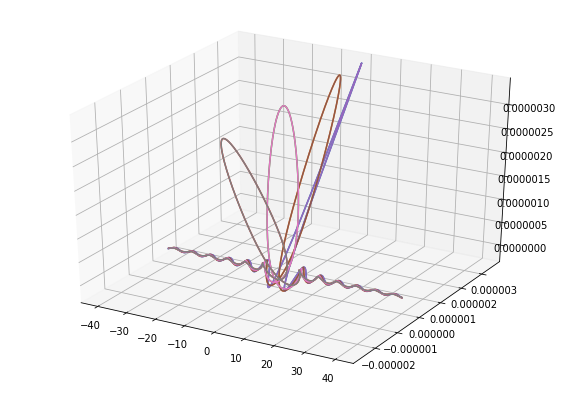

In [164]:
x = np.linspace(-1,1,10000)
y = np.linspace(-1,1,10000)
z = np.linspace(-40,40,10000)

E_x0, E_y0 = electric_field_GB(x,y, z, z_0 = 3, phase_shift = 0)
E_x1, E_y1 = electric_field_GB(x,y, z, z_0 = 3, phase_shift = np.pi/4)
E_x2, E_y2 = electric_field_GB(x,y, z, z_0 = 3, phase_shift = np.pi/2)
E_x3, E_y3 = electric_field_GB(x,y, z, z_0 = 3, phase_shift = np.pi*3/4)
E_x4, E_y4 = electric_field_GB(x,y, z, z_0 = 3, phase_shift = np.pi)
E_x5, E_y5 = electric_field_GB(x,y, z, z_0 = 3, phase_shift = np.pi*5/4)
E_x6, E_y6 = electric_field_GB(x,y, z, z_0 = 3, phase_shift = np.pi*3/2)
E_x7, E_y7 = electric_field_GB(x,y, z, z_0 = 3, phase_shift = np.pi*7/4)


EF_beam_prop = plt.figure(figsize = (10,7))
EF_beam_prop_ax = EF_beam_prop.add_subplot(111, projection = '3d')
Efield_beam0 = EF_beam_prop_ax.plot(z, E_x0,E_y0, label = '')
Efield_beam1 = EF_beam_prop_ax.plot(z, E_x1,E_y1, label = '')
Efield_beam2 = EF_beam_prop_ax.plot(z, E_x2,E_y2, label = '')
Efield_beam3 = EF_beam_prop_ax.plot(z, E_x3,E_y3, label = '')
Efield_beam4 = EF_beam_prop_ax.plot(z, E_x0,E_y4, label = '')
Efield_beam5 = EF_beam_prop_ax.plot(z, E_x1,E_y5, label = '')
Efield_beam6 = EF_beam_prop_ax.plot(z, E_x2,E_y6, label = '')
Efield_beam7 = EF_beam_prop_ax.plot(z, E_x3,E_y7, label = '')